# 4번 컬럼

In [1]:
import pandas as pd

df = pd.read_csv('./data/working/tpss_bcycl_od_statnhm_202406_통합_w_자치구.csv')
print(df.head())

      기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 시작_대여소_자치구 종료_대여소_ID  \
0  20240601  출발시간       0   ST-1002   목1동_004_1        양천구   ST-1017   
1  20240601  출발시간       0   ST-1015   목5동_001_1        양천구    ST-997   
2  20240601  출발시간       0   ST-1036   역촌동_001_1        은평구   ST-1035   
3  20240601  출발시간       0   ST-1045  성내2동_007_1        강동구   ST-1580   
4  20240601  출발시간       0   ST-1047  성내1동_023_1        강동구    ST-488   

      종료_대여소명 종료_대여소_자치구  전체_건수  전체_이용_분  전체_이용_거리  
0   목5동_059_1        양천구      1      8.0     870.0  
1   목4동_021_1        양천구      1     10.0    1552.0  
2  불광2동_021_1        은평구      1     42.0    4980.0  
3   오륜동_001_3        송파구      1      8.0    1923.0  
4  암사1동_044_1        강동구      1     18.0    3530.0  


In [3]:
df.shape

(8831528, 12)

In [5]:
columns_to_drop = ['전체_건수', '전체_이용_분', '전체_이용_거리']

df.drop(columns=columns_to_drop, axis=1, inplace=True)

print("--- 수정 후 열 목록 ---")
print(df.columns)

--- 수정 후 열 목록 ---
Index(['기준_날짜', '집계_기준', '기준_시간대', '시작_대여소_ID', '시작_대여소명', '시작_대여소_자치구',
       '종료_대여소_ID', '종료_대여소명', '종료_대여소_자치구'],
      dtype='object')


In [7]:
df[df.isnull().any(axis=1)]

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구
132,20240601,출발시간,0,ST-2308,화양동_041_2,광진구,X,NaN,NaN
805,20240601,출발시간,10,ST-1236,신도림동_062_1,구로구,X,NaN,NaN
832,20240601,출발시간,10,ST-1353,영등포본동_044_1,영등포구,X,NaN,NaN
943,20240601,출발시간,10,ST-2502,용신동_003_1,동대문구,X,NaN,NaN
1103,20240601,출발시간,10,ST-910,월곡2동_015_1,성북구,X,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8829566,20240630,도착시간,2335,ST-1747,마장동_028_1,NaN,X,NaN,NaN
8829708,20240630,도착시간,2335,ST-3098,천호2동_028_1,강동구,X,NaN,NaN
8830169,20240630,도착시간,2340,ST-2459,번1동_005_1,강북구,X,NaN,NaN
8831075,20240630,도착시간,2350,ST-2791,월계3동_010_1,노원구,X,NaN,NaN


In [9]:
df.dropna()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구
0,20240601,출발시간,0,ST-1002,목1동_004_1,양천구,ST-1017,목5동_059_1,양천구
1,20240601,출발시간,0,ST-1015,목5동_001_1,양천구,ST-997,목4동_021_1,양천구
2,20240601,출발시간,0,ST-1036,역촌동_001_1,은평구,ST-1035,불광2동_021_1,은평구
3,20240601,출발시간,0,ST-1045,성내2동_007_1,강동구,ST-1580,오륜동_001_3,송파구
4,20240601,출발시간,0,ST-1047,성내1동_023_1,강동구,ST-488,암사1동_044_1,강동구
...,...,...,...,...,...,...,...,...,...
8831523,20240630,도착시간,2355,ST-950,조원동_032_1,관악구,ST-709,미성동_014_1,관악구
8831524,20240630,도착시간,2355,ST-976,신림동_018_1,관악구,ST-2428,낙성대동_029_1,관악구
8831525,20240630,도착시간,2355,ST-988,자양3동_029_1,광진구,ST-114,군자동_020_1,광진구
8831526,20240630,도착시간,2355,ST-994,목1동_003_4,양천구,ST-2774,목5동_049_1,양천구


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. 결측치 제거 ---
df.dropna(subset=['시작_대여소_자치구', '종료_대여소_자치구'], inplace=True)

In [12]:
# --- 2. '출발'과 '도착' 데이터 분리 ---
df_departures = df[df['집계_기준'] == '출발시간'].copy()
df_arrivals = df[df['집계_기준'] == '도착시간'].copy()

In [15]:
# --- 3. 시간대 분류  ---
df_departures['시간'] = df_departures['기준_시간대'] // 100
df_arrivals['시간'] = df_arrivals['기준_시간대'] // 100

# 시간대 정의
active_hours = [8, 16, 17, 18, 19, 20]
intermediate_hours = [0, 6, 7, 9, 10, 11, 12, 13, 14, 15, 21, 22]
inactive_hours = [1, 2, 3, 4, 5, 23]

# 시간 분류 함수
def classify_time(hour):
    if hour in active_hours:
        return '활성 시간'
    elif hour in intermediate_hours:
        return '중간 시간'
    elif hour in inactive_hours:
        return '비활성 시간'

df_departures['시간_구분'] = df_departures['시간'].apply(classify_time)
df_arrivals['시간_구분'] = df_arrivals['시간'].apply(classify_time)

In [26]:
# --- 4. 시간대별 유출/유입량 계산 ---
outflow_df = df_departures[df_departures['시작_대여소_자치구'] != df_departures['종료_대여소_자치구']]
inflow_df = df_arrivals[df_arrivals['시작_대여소_자치구'] != df_arrivals['종료_대여소_자치구']]

outflow_counts = outflow_df.groupby(['시작_대여소_자치구', '시간_구분']).size().reset_index(name='유출량')
outflow_counts.rename(columns={'시작_대여소_자치구': '자치구'}, inplace=True)
inflow_counts = inflow_df.groupby(['종료_대여소_자치구', '시간_구분']).size().reset_index(name='유입량')
inflow_counts.rename(columns={'종료_대여소_자치구': '자치구'}, inplace=True)

In [27]:
# --- 5. 결과 종합 및 비율 계산 ---
final_summary = pd.merge(outflow_counts, inflow_counts, on=['자치구', '시간_구분'], how='outer')
final_summary.fillna(0, inplace=True)

final_summary['총 유출량'] = final_summary.groupby('자치구')['유출량'].transform('sum')
final_summary['총 유입량'] = final_summary.groupby('자치구')['유입량'].transform('sum')
final_summary['유출 비율(%)'] = (final_summary['유출량'] / final_summary['총 유출량']) * 100
final_summary['유입 비율(%)'] = (final_summary['유입량'] / final_summary['총 유입량']) * 100

int_cols = ['유출량', '유입량', '총 유출량', '총 유입량']
for col in int_cols:
    final_summary[col] = final_summary[col].astype(int)
final_summary = final_summary.round(1)

final_summary = final_summary.sort_values(by=['자치구', '시간_구분']).reset_index(drop=True)
final_summary = final_summary[['자치구', '시간_구분', '유출량', '유입량', '총 유출량', '총 유입량', '유출 비율(%)', '유입 비율(%)']]
final_summary.to_csv('./data/captures/final_summary_all_data.csv', index=False, encoding='utf-8-sig')

In [30]:
# --- 6. 시각화 ---
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False

# 데이터 재구성
outflow_pivot = final_summary.pivot(index='자치구', columns='시간_구분', values='유출 비율(%)')
inflow_pivot = final_summary.pivot(index='자치구', columns='시간_구분', values='유입 비율(%)')
time_order = ['비활성 시간', '중간 시간', '활성 시간']
outflow_pivot = outflow_pivot[time_order]
inflow_pivot = inflow_pivot[time_order]

# 색상 팔레트
outflow_colors = {'비활성 시간': '#1b5e20', '중간 시간': '#66bb6a', '활성 시간': '#a5d6a7'}
inflow_colors = {'비활성 시간': '#0d47a1', '중간 시간': '#42a5f5', '활성 시간': '#90caf9'}

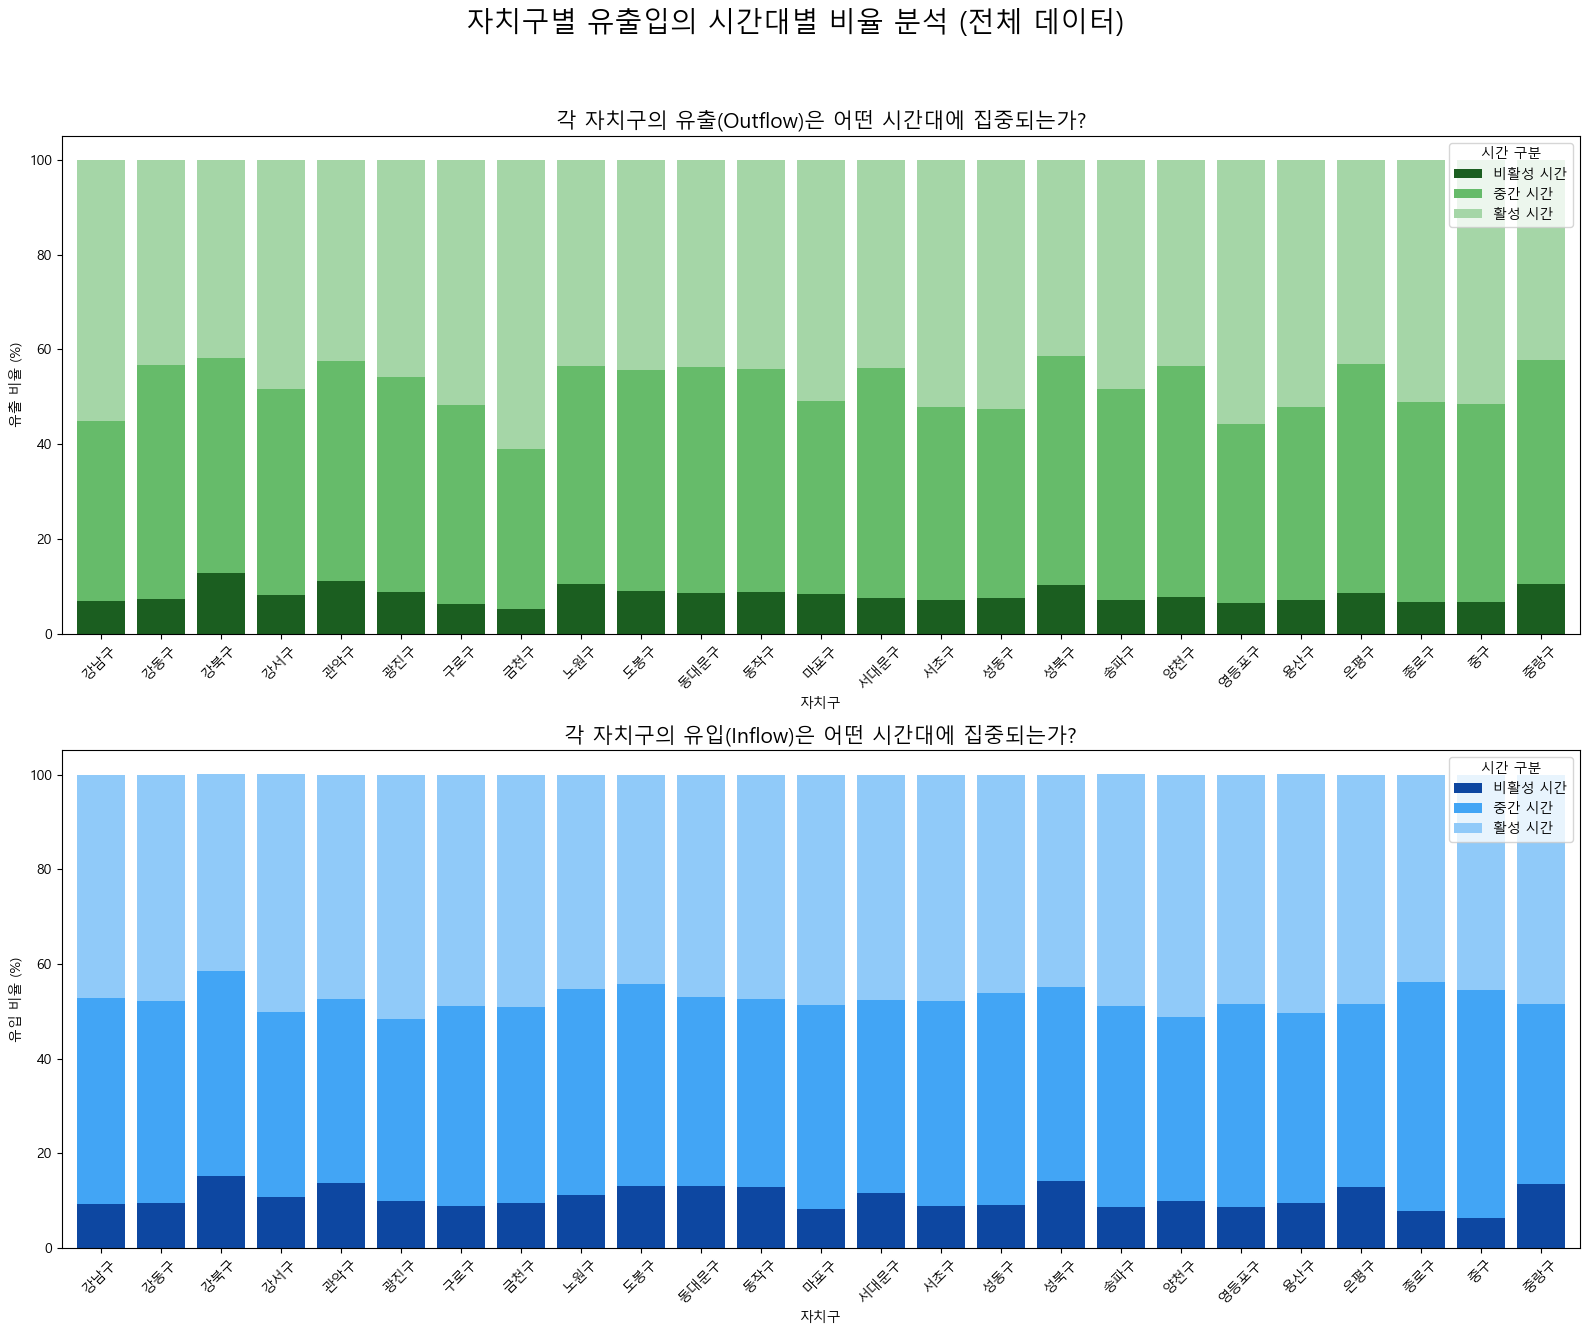


--- 분석 완료 ---
상세 분석 결과는 'final_summary_all_data.csv' 파일로 저장되었습니다.
시각화 그래프는 'final_visualization_all_data.png' 파일로 저장되었습니다.


In [32]:
# 그래프 생성
fig, axes = plt.subplots(2, 1, figsize=(16, 14))
fig.suptitle('자치구별 유출입의 시간대별 비율 분석 (전체 데이터)', fontsize=20)

# 유출 그래프
outflow_pivot.plot(kind='bar', stacked=True, ax=axes[0], color=[outflow_colors[t] for t in time_order], width=0.8)
axes[0].set_title('각 자치구의 유출(Outflow)은 어떤 시간대에 집중되는가?', fontsize=15)
axes[0].set_ylabel('유출 비율 (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='시간 구분')

# 유입 그래프
inflow_pivot.plot(kind='bar', stacked=True, ax=axes[1], color=[inflow_colors[t] for t in time_order], width=0.8)
axes[1].set_title('각 자치구의 유입(Inflow)은 어떤 시간대에 집중되는가?', fontsize=15)
axes[1].set_ylabel('유입 비율 (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='시간 구분')

# 레이아웃 조정 및 저장
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('./data/captures/final_visualization_all_data.png')
plt.show()

print("\n--- 분석 완료 ---")
print("상세 분석 결과는 'final_summary_all_data.csv' 파일로 저장되었습니다.")
print("시각화 그래프는 'final_visualization_all_data.png' 파일로 저장되었습니다.")

# 7번 컬럼

In [57]:
import pandas as pd
import chardet
import folium
import geopandas as gpd

# --- 상수 정의 ---

STATION_FILE = './6월 데이터.csv'
AREA_FILE = '서울시 각 자치구 면적 정보.csv'
GEO_JSON_URL = 'https://github.com/southkorea/seoul-maps/raw/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
OUTPUT_MAP_FILE = '6월_데이터_지도_시각화_개선.html'

In [59]:
def load_data(station_path, area_path):
    """
    대여소 및 면적 데이터를 불러오고 전처리하는 함수
    Args:
        station_path (str): 대여소 정보 CSV 파일 경로
        area_path (str): 면적 정보 CSV 파일 경로
    Returns:
        tuple: (대여소 개수 DataFrame, 면적 정보 DataFrame)
    """
    # 1. 대여소 정보 불러오기 및 집계
    try:
        stations_df = pd.read_csv(station_path, encoding='utf-8')
    except UnicodeDecodeError:
        stations_df = pd.read_csv(station_path, encoding='cp949')
    
    station_counts = stations_df['대여소 위치(구)'].value_counts().reset_index()
    station_counts.columns = ['자치구', '대여소_개수']
    station_counts['자치구'] = station_counts['자치구'].str.strip()

    # 2. 면적 정보 불러오기 및 정제
    with open(area_path, 'rb') as f:
        raw_data = f.read()
        detected_encoding = chardet.detect(raw_data)['encoding']
    
    area_df = pd.read_csv(area_path, encoding=detected_encoding)
    area_df.columns = area_df.columns.str.strip()
    area_df.rename(columns={area_df.columns[0]: '자치구', area_df.columns[1]: '면적'}, inplace=True)
    area_df['자치구'] = area_df['자치구'].str.strip()
    area_df['면적'] = pd.to_numeric(area_df['면적'], errors='coerce')
    
    return station_counts, area_df

In [61]:
def calculate_density(stations_df, area_df):
    """
    대여소 개수와 면적 정보를 병합하여 밀도를 계산하는 함수
    Args:
        stations_df (pd.DataFrame): 자치구별 대여소 개수 데이터
        area_df (pd.DataFrame): 자치구별 면적 데이터
    Returns:
        pd.DataFrame: 밀도 정보가 포함된 DataFrame
    """
    density_df = pd.merge(stations_df, area_df, on='자치구', how='inner')
    density_df['밀도(개/km²)'] = (density_df['대여소_개수'] / density_df['면적']).round(2)
    return density_df

In [63]:
def create_map(density_df, geo_url, output_path):
    """
    밀도 데이터를 기반으로 Folium 지도를 생성하고 저장하는 함수
    Args:
        density_df (pd.DataFrame): 자치구별 밀도 데이터
        geo_url (str): 서울시 자치구 GeoJSON 데이터 URL
        output_path (str): 저장할 HTML 파일 경로
    """
    # 1. 지도 데이터 준비
    geo_df = gpd.read_file(geo_url, encoding='utf-8')
    merged_df = geo_df.merge(density_df, left_on='name', right_on='자치구')

    # 2. Folium 지도 생성
    m = folium.Map(location=[37.566345, 126.977893], zoom_start=11, tiles='CartoDB positron')

    choropleth = folium.Choropleth(
        geo_data=merged_df,
        data=merged_df,
        columns=['자치구', '밀도(개/km²)'],
        key_on='feature.properties.name',
        fill_color='YlGnBu',
        fill_opacity=0.8,
        line_opacity=0.3,
        legend_name='자치구별 따릉이 대여소 밀도 (개/km²)'
    ).add_to(m)

    # 3. 툴팁 추가
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(
            fields=['name', '밀도(개/km²)'],
            aliases=['자치구:', '밀도:'],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
        )
    )

    # 4. 결과 저장
    m.save(output_path)

In [65]:
def main():
    """
    전체 프로세스를 실행하는 메인 함수
    """
    try:
        # 1단계: 데이터 로딩 및 전처리
        station_counts, area_info = load_data(STATION_FILE, AREA_FILE)
        
        # 2단계: 밀도 계산
        density_info = calculate_density(station_counts, area_info)
        
        # 3단계: 지도 생성 및 저장
        create_map(density_info, GEO_JSON_URL, OUTPUT_MAP_FILE)
        
        print(f"✅ 지도 시각화가 완료되었습니다.")
        print(f"'{OUTPUT_MAP_FILE}' 파일을 웹 브라우저로 열어 확인하세요.")

    except FileNotFoundError as e:
        print(f"🚨 파일 오류: '{e.filename}' 파일을 찾을 수 없습니다. 파일이 코드와 같은 위치에 있는지 확인하세요.")
    except Exception as e:
        print(f"🚨 코드 실행 중 오류가 발생했습니다: {e}")

In [67]:
# --- 스크립트 실행 ---
# 이 스크립트 파일이 직접 실행될 때만 main() 함수를 호출합니다.
if __name__ == "__main__":
    main()

🚨 파일 오류: './6월 데이터.csv' 파일을 찾을 수 없습니다. 파일이 코드와 같은 위치에 있는지 확인하세요.
